In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_csv("Clustered_Marketing_Campaign.csv")

In [3]:
df.head()

,Unnamed: 0,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Complain,Response,Customer_Dur,Age,Spent,Living_Status,Children_Count,Family_Member_Count,Is_Parent,Clusters
0,0,0,58138.0,0,0,58,635,88,546,172,...,0,1,83894400000000000,67,1617,0,0,1,0,1
1,1,0,46344.0,1,1,38,11,1,6,2,...,0,0,10800000000000000,70,27,0,2,3,1,3
2,2,0,71613.0,0,0,26,426,49,127,111,...,0,0,40780800000000000,59,776,1,0,2,0,1
3,3,0,26646.0,1,0,26,11,4,20,10,...,0,0,5616000000000000,40,53,1,1,3,1,2
4,4,1,58293.0,1,0,94,173,43,118,46,...,0,0,27734400000000000,43,422,1,1,3,1,0


In [4]:
df.shape

(2212, 32)

In [6]:
X = df[["Is_Parent","Income","Teenhome","Kidhome","Age","Family_Member_Count","Spent"]]
y = df["Clusters"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, min_samples_split=25,random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9661399548532731


In [7]:
import pickle
with open("customer_classification_model.pkl", "wb") as f:
    pickle.dump(random_forest, f)

F1 Score: 0.9663191958882987


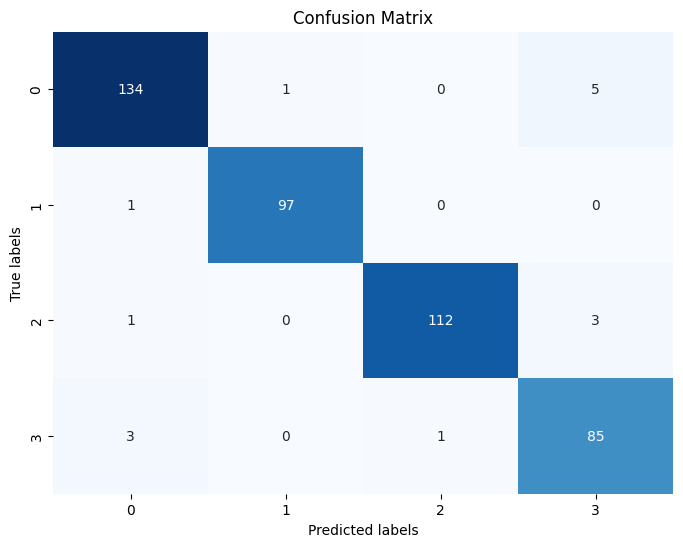

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [59]:
mask = (df["Clusters"] == 0) & (df["Age"] == 45)
mask2 = (df["Clusters"] == 0) & (df["Age"] == 45)
# print(df["Age"][mask].mode())
# print(df["Age"][mask].shape)
print(df[mask2]["Age"].mode())
df[mask2]["Age"]
df[df["Clusters"] == 0].shape

0    45
Name: Age, dtype: int64


(708, 32)

In [61]:
count = 0
for i in df[:]:
    print(i)
    # if i["Clusters"] == 0:
    #     count += 1

count

Unnamed: 0
Education
Income
Kidhome
Teenhome
Recency
Wines
Fruits
Meat
Fish
Sweets
Gold
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response
Customer_Dur
Age
Spent
Living_Status
Children_Count
Family_Member_Count
Is_Parent
Clusters


0

In [62]:
df["Clusters"]

0       1
1       3
2       1
3       2
4       0
       ..
2207    0
2208    0
2209    1
2210    0
2211    0
Name: Clusters, Length: 2212, dtype: int64

In [63]:
df.head()

,Unnamed: 0,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Complain,Response,Customer_Dur,Age,Spent,Living_Status,Children_Count,Family_Member_Count,Is_Parent,Clusters
0,0,0,58138.0,0,0,58,635,88,546,172,...,0,1,83894400000000000,67,1617,0,0,1,0,1
1,1,0,46344.0,1,1,38,11,1,6,2,...,0,0,10800000000000000,70,27,0,2,3,1,3
2,2,0,71613.0,0,0,26,426,49,127,111,...,0,0,40780800000000000,59,776,1,0,2,0,1
3,3,0,26646.0,1,0,26,11,4,20,10,...,0,0,5616000000000000,40,53,1,1,3,1,2
4,4,1,58293.0,1,0,94,173,43,118,46,...,0,0,27734400000000000,43,422,1,1,3,1,0


In [64]:
df.shape

(2212, 32)